In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
celebrity_images_folder = input("Enter the path to the Celebrity Faces Dataset: ")

# Initialize lists for images and labels
images = []
labels = []
label_encoder = LabelEncoder()

# Load images from the dataset
for celebrity_name in os.listdir(celebrity_images_folder):
    celebrity_folder = os.path.join(celebrity_images_folder, celebrity_name)
    if os.path.isdir(celebrity_folder):  # Ensure it's a directory
        for image_name in os.listdir(celebrity_folder):
            image_path = os.path.join(celebrity_folder, image_name)
            if image_path.endswith(('.jpg', '.jpeg', '.png')):  # Check for valid image files
                image = cv2.imread(image_path)
                image = cv2.resize(image, (100, 100))  # Resize to 100x100 pixels
                images.append(image)
                labels.append(celebrity_name)

# Convert lists to numpy arrays
images = np.array(images)
labels = label_encoder.fit_transform(labels)  # Convert names to numerical labels
images = images / 255.0  # Normalize the pixel values to [0, 1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


Enter the path to the Celebrity Faces Dataset:  /kaggle/input/face-recognition-detection/Face_recognition/Celebrity Faces Dataset


In [3]:
model = models.Sequential()

# Convolutional Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Save the trained model for later use
model.save("celebrity_face_recognition_model.h5")


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 6.0411e-04 - val_accuracy: 0.3063 - val_loss: 6.8155
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 5.0496e-04 - val_accuracy: 0.3063 - val_loss: 6.8754
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 4.3680e-04 - val_accuracy: 0.3063 - val_loss: 6.9459
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 3.7782e-04 - val_accuracy: 0.3063 - val_loss: 6.9941
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 3.6508e-04 - val_accuracy: 0.3063 - val_loss: 7.0399


Enter the path of the image to recognize faces:  /kaggle/input/face-recognition-detection/Face_recognition/Celebrity Faces Dataset/Robert Downey Jr/001_a51bb26a.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted celebrity: Robert Downey Jr


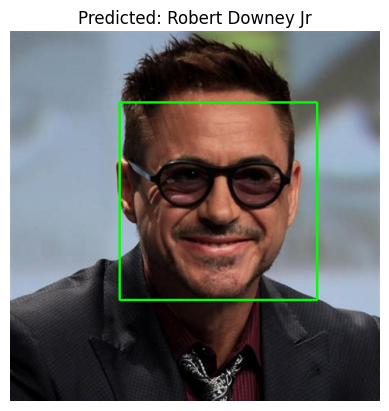

In [8]:
# Ask user for the path of the image to recognize
image_path = input("Enter the path of the image to recognize faces: ")

# Load the image and preprocess it
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (100, 100))  # Resize to 100x100 pixels
image_resized_for_prediction = np.expand_dims(image_resized, axis=0)  # Add batch dimension
image_resized_for_prediction = image_resized_for_prediction / 255.0  # Normalize the pixel values

# Predict the class (celebrity) of the image
prediction = model.predict(image_resized_for_prediction)
predicted_class = np.argmax(prediction)

# Decode the label back to the celebrity name
celebrity_name = label_encoder.inverse_transform([predicted_class])[0]

# Use OpenCV's face detection to detect faces in the original image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw bounding boxes around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result with the bounding box and predicted celebrity name
print(f"Predicted celebrity: {celebrity_name}")

# Display the image with the bounding box and predicted name
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {celebrity_name}")
plt.axis('off')
plt.show()
